#### Name Dipika Sharma
#### DSC 550 T302 Data Mining
#### Week 6

## Exercise 6.2

### Part 1: PCA and Variance Threshold in a Linear Regression

In [1]:
## Lets import the reqired libraries.

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split #used to split data into training/test sets

## from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings("ignore")
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

In [2]:
## Lets imports the yellowbrick library

import yellowbrick
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC

### 1. Import the housing data as a data frame and ensure that the data is loaded properly.

In [3]:
## Lets import the housing data as a data frame.

housing_df = pd.read_csv('train.csv') 
housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
## Using the shape function to see how many rows and column in there in data frame.

housing_df.shape

(1460, 81)

#### We can see we have 1460 rows and 81 columns in the data frame.

### 2. Drop the "Id" column and any features that are missing more than 40% of their values.

In [5]:
## Dropping ID column

housing_df = housing_df.drop(columns=["Id"])

In [6]:
## Deleting columns that are containing NULL value for more than 40%

## Setting the percentage value 40%
perc = 40.0

## Counting the NaN values percentage.
min_count =  int(((100-perc)/100)*housing_df.shape[0] + 1)

## Creating the new datafram and dropping the features with missing 40% values.
housingN_df = housing_df.dropna( axis=1, 
                thresh=min_count)
print("Lets check the Modified Dataframe : ")
print(housingN_df)

Lets check the Modified Dataframe : 
      MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0             60       RL         65.0     8450   Pave      Reg         Lvl   
1             20       RL         80.0     9600   Pave      Reg         Lvl   
2             60       RL         68.0    11250   Pave      IR1         Lvl   
3             70       RL         60.0     9550   Pave      IR1         Lvl   
4             60       RL         84.0    14260   Pave      IR1         Lvl   
...          ...      ...          ...      ...    ...      ...         ...   
1455          60       RL         62.0     7917   Pave      Reg         Lvl   
1456          20       RL         85.0    13175   Pave      Reg         Lvl   
1457          70       RL         66.0     9042   Pave      Reg         Lvl   
1458          20       RL         68.0     9717   Pave      Reg         Lvl   
1459          20       RL         75.0     9937   Pave      Reg         Lvl   

     Utilities

In [7]:
## Lets check the new dataframe without features that are missing more than 40% of their values

housingN_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [8]:
## Lets also check the number of rows and column in new dataframe

print("Number of rows and columns present in the dataframe: {}".format(housingN_df.shape))

Number of rows and columns present in the dataframe: (1460, 75)


#### We have 75 columns in the dataframe after removing features which has missing values more then 40%

In [9]:
## Let check the datatypes of all the columns in the dataframe.

housingN_df.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 75, dtype: object

### 3. For numerical columns, fill in any missing data with the median value

In [10]:
## Lets look for the numerical columns in the dataframe.

NumColumns = housingN_df.select_dtypes("number").columns

NumColumns= list(NumColumns)

In [11]:
## Lets display all the columns with numerical values.

NumColumns

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [12]:
## Checking the meadian for all columns.

housingN_df.median()

MSSubClass           50.0
LotFrontage          69.0
LotArea            9478.5
OverallQual           6.0
OverallCond           5.0
YearBuilt          1973.0
YearRemodAdd       1994.0
MasVnrArea            0.0
BsmtFinSF1          383.5
BsmtFinSF2            0.0
BsmtUnfSF           477.5
TotalBsmtSF         991.5
1stFlrSF           1087.0
2ndFlrSF              0.0
LowQualFinSF          0.0
GrLivArea          1464.0
BsmtFullBath          0.0
BsmtHalfBath          0.0
FullBath              2.0
HalfBath              0.0
BedroomAbvGr          3.0
KitchenAbvGr          1.0
TotRmsAbvGrd          6.0
Fireplaces            1.0
GarageYrBlt        1980.0
GarageCars            2.0
GarageArea          480.0
WoodDeckSF            0.0
OpenPorchSF          25.0
EnclosedPorch         0.0
3SsnPorch             0.0
ScreenPorch           0.0
PoolArea              0.0
MiscVal               0.0
MoSold                6.0
YrSold             2008.0
SalePrice        163000.0
dtype: float64

In [13]:
## Lets fill out the missing values with the median

housingN_df = housingN_df.fillna(housingN_df.median())

## Lets check out the the data frame.

housingN_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [14]:
## Using describe to see if we have any nan values

housingN_df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#### We can see from above that there is no Null values present in the numerical columns of the dataframe.

In [15]:
## Lets check the number of rows and columns again of the dataframe

print("Number of rows and columns present in the dataframe: {}".format(housingN_df.shape))

Number of rows and columns present in the dataframe: (1460, 75)


In [16]:
## Using isna to make sure there is no missing vakues in numerical columns.

housingN_df[NumColumns].isna().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

#### Again it shows the missing values are not present in numercial columns of the dataframe.

### 4. For categorical columns, fill in any missing data with the most common value (mode).

In [17]:
## Lets find out the categorical columns in the dataframe.

CateColumns = housingN_df.select_dtypes("object").columns

## Storing the categorical columns in a list.

CateColumns= list(set(CateColumns))

In [18]:
## Lets print out the categorical columns of the dataframe.

CateColumns

['SaleType',
 'RoofMatl',
 'Utilities',
 'Neighborhood',
 'GarageQual',
 'Condition1',
 'BsmtCond',
 'BldgType',
 'KitchenQual',
 'LandContour',
 'HouseStyle',
 'BsmtExposure',
 'ExterCond',
 'MSZoning',
 'MasVnrType',
 'LandSlope',
 'BsmtFinType1',
 'GarageFinish',
 'HeatingQC',
 'SaleCondition',
 'ExterQual',
 'Heating',
 'CentralAir',
 'LotShape',
 'Exterior1st',
 'Street',
 'RoofStyle',
 'BsmtQual',
 'BsmtFinType2',
 'Functional',
 'GarageType',
 'Exterior2nd',
 'GarageCond',
 'LotConfig',
 'PavedDrive',
 'Electrical',
 'Condition2',
 'Foundation']

In [19]:
## Lets calculate the mode for each columns.

CateMode = housingN_df.mode()

## Lets display the mode of the columns.

CateMode

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,20,RL,69.0,7200,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,6,2009,WD,Normal,140000


In [20]:
## Using for loop to update the missing values of the categorical columns with the mode value.

for catcolum in CateColumns:
    housingN_df[catcolum] = housingN_df[catcolum].fillna(housingN_df[catcolum].mode()[0])

In [21]:
## lets again using the shape to find out the number of rows and columns of the dataframe.

print("Number of rows and columns present in the dataframe: {}".format(housingN_df.shape))

Number of rows and columns present in the dataframe: (1460, 75)


In [22]:
## Lets checking if we have any presence of missing values in the categorical columns.

housingN_df[CateColumns].isna().sum()

SaleType         0
RoofMatl         0
Utilities        0
Neighborhood     0
GarageQual       0
Condition1       0
BsmtCond         0
BldgType         0
KitchenQual      0
LandContour      0
HouseStyle       0
BsmtExposure     0
ExterCond        0
MSZoning         0
MasVnrType       0
LandSlope        0
BsmtFinType1     0
GarageFinish     0
HeatingQC        0
SaleCondition    0
ExterQual        0
Heating          0
CentralAir       0
LotShape         0
Exterior1st      0
Street           0
RoofStyle        0
BsmtQual         0
BsmtFinType2     0
Functional       0
GarageType       0
Exterior2nd      0
GarageCond       0
LotConfig        0
PavedDrive       0
Electrical       0
Condition2       0
Foundation       0
dtype: int64

In [23]:
## Lets check the top 5 rows of the dataframe.

housingN_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


### 5. Convert the categorical columns to dummy variables

In [24]:
## We already know which columns has categorical values.

CateColumns

['SaleType',
 'RoofMatl',
 'Utilities',
 'Neighborhood',
 'GarageQual',
 'Condition1',
 'BsmtCond',
 'BldgType',
 'KitchenQual',
 'LandContour',
 'HouseStyle',
 'BsmtExposure',
 'ExterCond',
 'MSZoning',
 'MasVnrType',
 'LandSlope',
 'BsmtFinType1',
 'GarageFinish',
 'HeatingQC',
 'SaleCondition',
 'ExterQual',
 'Heating',
 'CentralAir',
 'LotShape',
 'Exterior1st',
 'Street',
 'RoofStyle',
 'BsmtQual',
 'BsmtFinType2',
 'Functional',
 'GarageType',
 'Exterior2nd',
 'GarageCond',
 'LotConfig',
 'PavedDrive',
 'Electrical',
 'Condition2',
 'Foundation']

In [25]:
## Using the get_dummies function for creating the dummmy variables.

housing_dummy_df = pd.get_dummies(housingN_df, columns=CateColumns)

In [26]:
## Lets display the top 5 rows of the dataframe.

housing_dummy_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,0,0,0,1,0,0,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,0,1,0,0,0,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,0,0,0,1,0,0,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,0,0,0,1,0,0,0


In [27]:
## Lets check out the number of rows and columns of the new dataframe.

housing_dummy_df.shape

(1460, 271)

#### As we can see the dataframe now has 271 rows and 1460 columns.

### 6. Split the data into a training and test set, where the SalePrice column is the target.

In [28]:
## Lets split the data into a training and test set.

X = housing_dummy_df.drop(['SalePrice'], axis = 1)

Y = housing_dummy_df['SalePrice']

In [29]:
## Pareto Principle Split
## Using train_test_split function to split the data into 80% training and 20% testing.

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2)

In [30]:
## Lets reset the index in the training and test sets.

X_train = X_train.reset_index(drop = True)
X_test = X_test.reset_index(drop = True)
Y_train = Y_train.reset_index(drop = True)
Y_test = Y_test.reset_index(drop = True)

In [31]:
## lets check the number of rows and columns of the split data

print("The shape of X training dataset is: {}".format(X_train.shape))
print("The shape of Y training dataset is: {}".format(Y_train.shape))
print("The shape of X testing dataset is: {}".format(X_test.shape))
print("The shape of Y testing dataset is: {}".format(Y_test.shape))

The shape of X training dataset is: (1168, 270)
The shape of Y training dataset is: (1168,)
The shape of X testing dataset is: (292, 270)
The shape of Y testing dataset is: (292,)


In [32]:
## Lets see how many values of saleprice are in training and test sets

print(Y_train.value_counts())
print(Y_test.value_counts())

140000    19
135000    13
155000    13
145000    12
115000    12
          ..
217000     1
196500     1
123500     1
293077     1
466500     1
Name: SalePrice, Length: 581, dtype: int64
110000    5
135000    4
180000    3
127000    3
175000    3
         ..
114500    1
252678    1
297000    1
244400    1
178000    1
Name: SalePrice, Length: 217, dtype: int64


In [33]:
## Lets look for nulls in both training and test sets.

print(X_train.isna().sum())
print(X_test.isna().sum())

MSSubClass           0
LotFrontage          0
LotArea              0
OverallQual          0
OverallCond          0
                    ..
Foundation_CBlock    0
Foundation_PConc     0
Foundation_Slab      0
Foundation_Stone     0
Foundation_Wood      0
Length: 270, dtype: int64
MSSubClass           0
LotFrontage          0
LotArea              0
OverallQual          0
OverallCond          0
                    ..
Foundation_CBlock    0
Foundation_PConc     0
Foundation_Slab      0
Foundation_Stone     0
Foundation_Wood      0
Length: 270, dtype: int64


### 7. Run a linear regression and report the R2-value and RMSE on the test set.

In [34]:
## lets import the required library

from sklearn.linear_model import LinearRegression

In [35]:
## Lets create the variable for linear regression model 

Linear_Reg = LinearRegression()

## lets apply the linear regression to training set

Linear_Reg.fit(X_train, Y_train)

LinearRegression()

In [36]:
## Making prediction on test set using the linear regression model

Y_pred = Linear_Reg.predict(X_test)

In [37]:
## Lets import the required libraries.

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt

In [38]:
## lets calculate the R2 and RMSE on the test set

print("The R2 value on the test set is: ", r2_score(Y_test, Y_pred))
print("The RMSE on the test set is: ", sqrt(mean_squared_error(Y_test, Y_pred)))

The R2 value on the test set is:  0.8816030737999849
The RMSE on the test set is:  26618.072914099743


### 8. Fit and transform the training features with a PCA so that 90% of the variance is retained (see section 9.1 in the Machine Learning with Python Cookbook).

In [39]:
## Lets import the required libraries.

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [40]:
## Lets instantiate the StandardScaler visualizer

StndScaler = StandardScaler()

In [41]:
## Lets fit the visualizer and the model

Matrix_Xtrain=StndScaler.fit_transform(X_train)

In [42]:
## Creating PCA

pca = PCA(n_components=0.9, whiten=True)

In [43]:
## Lets fit and transform the PCA

Matrix_pca = pca.fit_transform(Matrix_Xtrain)

### 9. How many features are in the PCA-transformed matrix?

In [44]:
## Lets use the shape function to see the features in the PCA matrix.

print("The features before transforming the traing to PCA matrixs:", Matrix_Xtrain.shape[1])
print("The features after transforming the training to PCA Matrix:", Matrix_pca.shape[1])

The features before transforming the traing to PCA matrixs: 270
The features after transforming the training to PCA Matrix: 138


### 10. Transform but DO NOT fit the test features with the same PCA.

In [45]:
## Lets transform visualizer and model on the test set.

Matrix_Xtest = StndScaler.transform(X_test)

In [46]:
## transform the test features to PCA Matrix

Matrix_test_pca = pca.transform(Matrix_Xtest)

In [47]:
## Lets check the how many test features we have in PCA matrix.

print("The features after transforming the testing set to PCA Matrix:", Matrix_test_pca.shape[1])

The features after transforming the testing set to PCA Matrix: 138


### 11. Repeat step 7 with your PCA transformed data.

In [48]:
## Lets create the variable for linear regression model 

Linear_Reg = LinearRegression()

## lets apply the linear regression to training set

Linear_Reg.fit(Matrix_pca, Y_train)

LinearRegression()

In [49]:
## Making prediction on test set using the linear regression model

Y_pred_PCA = Linear_Reg.predict(Matrix_test_pca)

In [50]:
## lets calculate the R2 and RMSE on the test set

print("The R2 value on the test set is: ", r2_score(Y_test, Y_pred_PCA))
print("The RMSE on the test set is: ", sqrt(mean_squared_error(Y_test, Y_pred_PCA)))

The R2 value on the test set is:  0.8678598587396059
The RMSE on the test set is:  28120.548017033514


### 12. Take your original training features (from step 6) and apply a min-max scaler to them.

In [51]:
## Lets import the required library.

from sklearn import preprocessing

In [52]:
## Lets visualize the min-max scaler

min_max_Scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

In [53]:
## Applying the min-max scaler on original sets.

Matrix_Scaler = min_max_Scaler.fit_transform(X_train) 

In [54]:
## Lets check the features of the min-max scaler matrix

Matrix_Scaler.shape

(1168, 270)

### 13. Find the min-max scaled features in your training set that have a variance above 0.1 (see Section 10.1 in the Machine Learning with Python Cookbook).

In [55]:
## Lets import the required library.

from sklearn.feature_selection import VarianceThreshold

In [56]:
## Intializing the variance threshold.

VThreshold = VarianceThreshold(threshold=0.1)

In [57]:
## Creating threshold matrix.

Matrix_VThreshold = VThreshold.fit_transform(Matrix_Scaler) 

In [58]:
## Lets check the high variance features.

Matrix_VThreshold[0:3]

array([[0.93333333, 0.75      , 1.        , 0.        , 1.        ,
        1.        , 1.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 1.        ,
        0.        , 1.        , 0.        , 1.        , 0.        ,
        0.        , 1.        , 1.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ,
        1.        , 0.        , 1.        , 0.        , 1.        ,
        1.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 1.        , 0.        , 1.        ],
       [0.        , 0.25      , 1.        , 0.        , 1.        ,
        1.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 1.        , 1.        , 1.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 1.        , 0. 

### 14. Transform but DO NOT fit the test features with the same steps applied in steps 11 and 12.

In [59]:
## Applying the min-max scaler on test set

Matrix_Scaler_Test = min_max_Scaler.transform(X_test)

In [60]:
## Lets check the features

Matrix_Scaler_Test

array([[0.        , 0.16438356, 0.0551709 , ..., 0.        , 0.        ,
        0.        ],
       [0.82352941, 0.01027397, 0.00505722, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.16438356, 0.0265305 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.05882353, 0.09931507, 0.02252122, ..., 0.        , 0.        ,
        0.        ],
       [0.23529412, 0.16438356, 0.03810455, ..., 0.        , 0.        ,
        0.        ],
       [0.05882353, 0.13356164, 0.02193643, ..., 0.        , 0.        ,
        0.        ]])

In [61]:
## Creating high variance feature matrix

Matrix_Test_hVariance = VThreshold.transform(Matrix_Scaler_Test)

In [62]:
## Let check the high variance matrix features.

Matrix_Test_hVariance[0:3]

array([[0.06666667, 0.5       , 1.        , 0.        , 0.        ,
        1.        , 0.        , 1.        , 1.        , 0.        ,
        0.        , 0.        , 1.        , 1.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        1.        , 1.        , 0.        , 1.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 1.        ,
        1.        , 0.        , 1.        , 0.        , 1.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 1.        ],
       [0.81666667, 1.        , 1.        , 0.        , 1.        ,
        0.        , 1.        , 0.        , 0.        , 1.        ,
        0.        , 1.        , 1.        , 0.        , 0.        ,
        0.        , 1.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 1. 

### 15. Repeat step 7 with the high variance data.

In [63]:
## Lets create the variable for linear regression model 

Linear_Reg = LinearRegression()

## Lets fit the model on a training set with high variance features.

Linear_Reg.fit(Matrix_VThreshold, Y_train)

## Making prediction on test set using the linear regression model

Y_pred_MinMax = Linear_Reg.predict(Matrix_Test_hVariance)

In [64]:
## lets calculate the R2 and RMSE on the test set

print("The R2 value on the test set is: ", r2_score(Y_test, Y_pred_MinMax))
print("The RMSE on the test set is: ", sqrt(mean_squared_error(Y_test, Y_pred_MinMax)))

The R2 value on the test set is:  0.6565847304036307
The RMSE on the test set is:  45333.18133477405


### 16. Summarize your findings

As we know when R2 is large it means that the regression model fitting the observation. When the R2 value is high it suggest the better fit for the model. Also the RMSE value if low it stat that the accuracy of prediction are close and suggest that the model is close to accuracy. <br><br> Let compare the R2 and RMSE values of all the three model we created in this week assignment. 

#### Linear Regression:
The R2 value on the test set is:  0.877626681114572 <br>The RMSE on the test set is:  27642.098651400658

#### PCA Transformed Model
The R2 value on the test set is:  0.8437910328225456 <br>The RMSE on the test set is:  31230.621268647887

#### Min-Max Scaler Transformed Model
The R2 value on the test set is:  0.6627050855587344 <br>The RMSE on the test set is:  45891.53028884183

As we can see out of all the above three model Linear regression model seems to have maximum R2 which is 87.76% and it suggest the better fit to the model. Also The RMSE value is low for linear regression which again suggest the predicted model is close to accuracy.

### Part 2: Categorical Feature Selection

Download the data from this link Mushroom Classification. Based on several categorical features, you will predict whether or not a mushroom is edible or poisonous.

### 1. Import the data as a data frame and ensure it is loaded correctly

In [65]:
## Lets import the data.

mushroom_df = pd.read_csv('mushrooms.csv') 

## Lets check top few rows of the dataframe.

mushroom_df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [66]:
## lets check how many rows and columns the mushroom dataset has.

mushroom_df.shape

(8124, 23)

#### We can see that mushroom dataset has 23 columns and 8124 rows.

In [67]:
## The class columns has p and e values. The p value is for poisonous and the e is for edible
## Lets create a new variable class_code which is value 1 for class value p and 0 for class value e.

mushroom_df['Class_Code'] = mushroom_df['class'].replace(to_replace=["p","e"], value=[1,0])

## lets check the top five rows for the dataframe with new column.

mushroom_df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,Class_Code
0,p,x,s,n,t,p,f,c,n,k,...,w,w,p,w,o,p,k,s,u,1
1,e,x,s,y,t,a,f,c,b,k,...,w,w,p,w,o,p,n,n,g,0
2,e,b,s,w,t,l,f,c,b,n,...,w,w,p,w,o,p,n,n,m,0
3,p,x,y,w,t,p,f,c,n,n,...,w,w,p,w,o,p,k,s,u,1
4,e,x,s,g,f,n,f,w,b,k,...,w,w,p,w,o,e,n,a,g,0


In [68]:
## Lets also check the rows and columns of the dataframe

mushroom_df.shape

(8124, 24)

### 2. Convert the categorical features (all of them) to dummy variables

In [69]:
## Lets find out the categorical columns in the dataframe.

CateColumns = mushroom_df.select_dtypes("object").columns

## Storing the categorical columns in a list.

CateColumns= list(set(CateColumns))

In [70]:
## Lets print out the categorical columns of the dataframe.

CateColumns

['cap-shape',
 'ring-type',
 'stalk-surface-below-ring',
 'gill-size',
 'stalk-color-below-ring',
 'bruises',
 'stalk-root',
 'gill-spacing',
 'stalk-surface-above-ring',
 'gill-attachment',
 'odor',
 'cap-color',
 'veil-type',
 'cap-surface',
 'ring-number',
 'veil-color',
 'spore-print-color',
 'class',
 'gill-color',
 'stalk-shape',
 'stalk-color-above-ring',
 'habitat',
 'population']

In [71]:
## Using the get_dummies function for creating the dummmy variables.

mushroomDummy_df = pd.get_dummies(mushroom_df, columns=CateColumns)

In [72]:
## Lets display the top 5 rows of the dataframe.

mushroomDummy_df.head()

,Class_Code,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,ring-type_e,ring-type_f,ring-type_l,...,habitat_m,habitat_p,habitat_u,habitat_w,population_a,population_c,population_n,population_s,population_v,population_y
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [73]:
## Lets check out the number of rows and columns of the new dataframe.

mushroomDummy_df.shape

(8124, 120)

#### We can see now the dataframe has 119 rows and 8124 columns.

### 3. Split the data into a training and test set

In [74]:
## Lets split the data into a training and test set.

X = mushroomDummy_df.drop(['Class_Code'], axis = 1)

Y = mushroomDummy_df['Class_Code']

In [75]:
## Pareto Principle Split
## Using train_test_split function to split the data into 80% training and 20% testing.

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2)

In [76]:
## Lets reset the index in the training and test sets.

X_train = X_train.reset_index(drop = True)
X_test = X_test.reset_index(drop = True)
Y_train = Y_train.reset_index(drop = True)
Y_test = Y_test.reset_index(drop = True)

In [77]:
## lets check the number of rows and columns of the split data

print("The shape of X training dataset is: {}".format(X_train.shape))
print("The shape of Y training dataset is: {}".format(Y_train.shape))
print("The shape of X testing dataset is: {}".format(X_test.shape))
print("The shape of Y testing dataset is: {}".format(Y_test.shape))

The shape of X training dataset is: (6499, 119)
The shape of Y training dataset is: (6499,)
The shape of X testing dataset is: (1625, 119)
The shape of Y testing dataset is: (1625,)


In [78]:
## Lets see how many values of class code are in training and test sets

print(Y_train.value_counts())
print(Y_test.value_counts())

0    3368
1    3131
Name: Class_Code, dtype: int64
0    840
1    785
Name: Class_Code, dtype: int64


### 4. Fit a decision tree classifier on the training set

In [79]:
## Lets import the reuired libraries. 

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [80]:
## Initializing the Decision Tree Classifier

model = DecisionTreeClassifier() 

## Lets fit the decision tree classifier on the training set.

model.fit(X_train,Y_train)

## Lets predict the dependent variable on test set.

Y_pred_mushroom = model.predict(X_test)

### 5. Report the accuracy and create a confusion matrix for the model prediction on the test set

In [81]:
## Lets import required libraries.

from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics

The model accuracy on the test set is: 100.0%


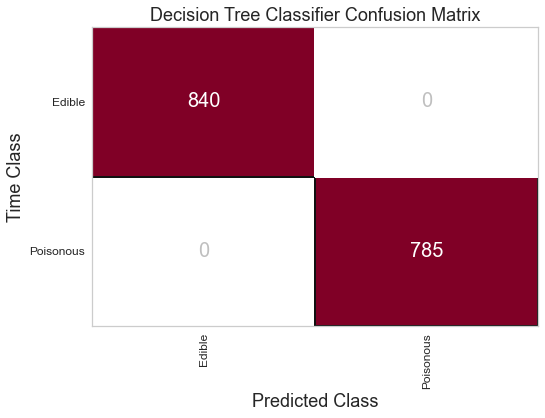

In [82]:
## Lets create label for confusion matrix.
## As we know for class column values p and e where p means posionous and e value means edible.
## Lets see if p then 1 and for e it is 0

label = {0: 'Edible', 1: 'Poisonous'}

## Lets initialize the confusion matrix.

CMatrix = ConfusionMatrix(model, encoder = label,  percent=False)

## Lets fir the test set to the confusion matrix.

CMatrix.fit(X_test, Y_test)

## Lets get the accuracy and create a confusion matrix on the test sets.

model_accuracy = 100*CMatrix.score(X_test, Y_test)

print('The model accuracy on the test set is: ', round(model_accuracy,2), '%', sep = '')

## changing the label fontsize in the confustion matrix

for labelsize in CMatrix.ax.texts:
    labelsize.set_size(20)

## Lets show the confusion matrix for the test set

plt.xlabel('Predicted Class', fontsize=18)
plt.ylabel('Time Class', fontsize=18)
plt.title('Decision Tree Classifier Confusion Matrix', fontsize=18)
plt.show()

### 6. Create a visualization of the decision tree

In [83]:
## Lets drop the class code column.

feature_list = list(mushroomDummy_df.drop(['Class_Code'], axis=1).columns)

## Displa the features.
feature_list

['cap-shape_b',
 'cap-shape_c',
 'cap-shape_f',
 'cap-shape_k',
 'cap-shape_s',
 'cap-shape_x',
 'ring-type_e',
 'ring-type_f',
 'ring-type_l',
 'ring-type_n',
 'ring-type_p',
 'stalk-surface-below-ring_f',
 'stalk-surface-below-ring_k',
 'stalk-surface-below-ring_s',
 'stalk-surface-below-ring_y',
 'gill-size_b',
 'gill-size_n',
 'stalk-color-below-ring_b',
 'stalk-color-below-ring_c',
 'stalk-color-below-ring_e',
 'stalk-color-below-ring_g',
 'stalk-color-below-ring_n',
 'stalk-color-below-ring_o',
 'stalk-color-below-ring_p',
 'stalk-color-below-ring_w',
 'stalk-color-below-ring_y',
 'bruises_f',
 'bruises_t',
 'stalk-root_?',
 'stalk-root_b',
 'stalk-root_c',
 'stalk-root_e',
 'stalk-root_r',
 'gill-spacing_c',
 'gill-spacing_w',
 'stalk-surface-above-ring_f',
 'stalk-surface-above-ring_k',
 'stalk-surface-above-ring_s',
 'stalk-surface-above-ring_y',
 'gill-attachment_a',
 'gill-attachment_f',
 'odor_a',
 'odor_c',
 'odor_f',
 'odor_l',
 'odor_m',
 'odor_n',
 'odor_p',
 'odor_s',


In [84]:
## Initialize the Decision Tree Classifier

model = DecisionTreeClassifier() 

## Lets fit the model on the training set.

model.fit(X_train,Y_train)

DecisionTreeClassifier()

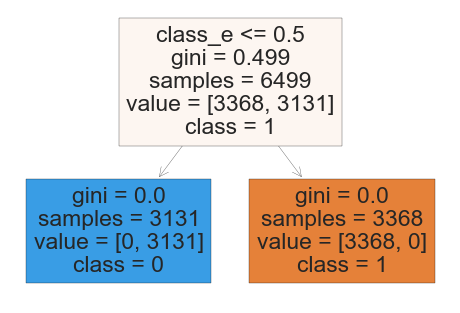

In [85]:
## Lets plot the decision tree.

from sklearn import tree as t

feature_list = list(mushroomDummy_df.drop(['Class_Code'], axis=1).columns)
targetV = [str(s) for s in mushroomDummy_df.Class_Code]
tree = t.plot_tree(model, filled=True, feature_names=feature_list, class_names=targetV)

### 7. Use a χ2-statistic selector to pick the five best features for this data (see section 10.4 of the Machine Learning with Python Cookbook).

In [86]:
## Lets import the required libraries.

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif

In [87]:
## Lets create the features list and class name.

features = X_train
target = Y_train

In [88]:
## Converting categorical data to the numerical data.

features = features.astype(int)

In [89]:
## Select five features with highest chi-squared statistics - using refernce from book

chi2_selector=SelectKBest(chi2, k=5)
features_kbest = chi2_selector.fit_transform(features, target)

In [90]:
## Printing the results.

print ("The original number of features:", features.shape[1])
print ("The reduced number of features:", features_kbest.shape[1])

The original number of features: 119
The reduced number of features: 5


### 8. Which five features were selected in step 7? Hint: Use the get_support function

In [91]:
## Lets get all the columns using get_support.

columns = chi2_selector.get_support(indices=True)

## Creating new dataframe using the columns

best_features_df = features.iloc[:,columns]

In [92]:
## Lets check the first five rows of the dataframe.

best_features_df.head()

,stalk-surface-above-ring_k,odor_f,odor_n,class_e,class_p
0,1,0,0,0,1
1,0,0,1,1,0
2,1,0,0,0,1
3,0,0,1,1,0
4,0,0,0,1,0


In [93]:
## Lets find out the number of rows and columns of the new dataframe.

best_features_df.shape

(6499, 5)

#### We can see the new dataframe has 6499 rows and 5 columns.

### 9. Repeat steps 4 and 5 with the five best features selected in step 7.

In [94]:
## Lets split the data into a training and test set.

X = mushroomDummy_df[['class_e', 'class_p', 'stalk-surface-above-ring_k', 'odor_f', 'odor_n']]

Y = mushroomDummy_df['Class_Code']

In [95]:
## Pareto Principle Split
## Using train_test_split function to split the data into 80% training and 20% testing.

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2)

In [96]:
## Lets reset the index in the training and test sets.

X_train = X_train.reset_index(drop = True)
X_test = X_test.reset_index(drop = True)
Y_train = Y_train.reset_index(drop = True)
Y_test = Y_test.reset_index(drop = True)

In [97]:
## lets check the number of rows and columns of the split data

print("The shape of X training dataset is: {}".format(X_train.shape))
print("The shape of Y training dataset is: {}".format(Y_train.shape))
print("The shape of X testing dataset is: {}".format(X_test.shape))
print("The shape of Y testing dataset is: {}".format(Y_test.shape))

The shape of X training dataset is: (6499, 5)
The shape of Y training dataset is: (6499,)
The shape of X testing dataset is: (1625, 5)
The shape of Y testing dataset is: (1625,)


In [98]:
## Initializing the Decision Tree Classifier

model = DecisionTreeClassifier() 

## Lets fit the decision tree classifier on the training set.

model.fit(X_train,Y_train)

## Lets predict the dependent variable on test set.

Y_pred_chi = model.predict(X_test)

The model accuracy on the test set is: 100.0%


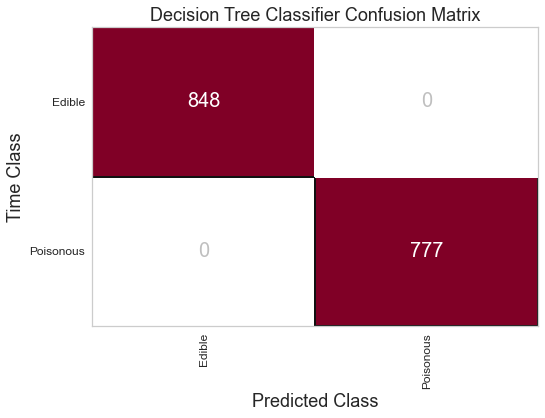

In [99]:
## Lets create label for confusion matrix.
## As we know for class column values p and e where p means posionous and e value means edible.
## Lets see if p then 1 and for e it is 0

label = {0: 'Edible', 1: 'Poisonous'}

## Lets initialize the confusion matrix.

CMatrix = ConfusionMatrix(model, encoder = label,  percent=False)

## Lets fir the test set to the confusion matrix.

CMatrix.fit(X_test, Y_test)

## Lets get the accuracy and create a confusion matrix on the test sets.

model_accuracy = 100*CMatrix.score(X_test, Y_test)

print('The model accuracy on the test set is: ', round(model_accuracy,2), '%', sep = '')

## changing the label fontsize in the confustion matrix

for labelsize in CMatrix.ax.texts:
    labelsize.set_size(20)

## Lets show the confusion matrix for the test set

plt.xlabel('Predicted Class', fontsize=18)
plt.ylabel('Time Class', fontsize=18)
plt.title('Decision Tree Classifier Confusion Matrix', fontsize=18)
plt.show()

### 10. Summarize your findings.

#### Decision Tree classifier confusion matrix says that the model is correctectly classified 852 positive class - edible and 773 negative class - poisonous. False positive and False Negative is zero. The above model is seems to be an ideal classifier for our dataset with 100%of true positive and true negative values. Since the positive class value is greater then the negative class that means the mushroom is edible. <br><br> It is also intersting to see that the accuracy is 100% in both cases when we use all the features that is 119 of the dataset or if we use only 5 best features. Relatively good accuracy can be achieved no matter if we reduce the features.